# Healthcare - Persistency of a Drug

## <u> Exploratory Data Analysis </u>

Import libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Read cleaned data

In [33]:
df = pd.read_csv("New_data.csv")
# First column in df
# is just serial number, we can drop that column
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)
df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,min_max_Dexa_Freq_During_Rx,min_max_Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,0,0.0,0.00
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,0,0.0,0.00
2,Non-Persistent,Female,Caucasian,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,2,0.0,0.50
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,1,0.0,0.25
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,1,0.0,0.25


### Data Exploration

<u>Basic information</u>

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2942 entries, 0 to 2941
Data columns (total 66 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Persistency_Flag                                                    2942 non-null   object 
 1   Gender                                                              2942 non-null   object 
 2   Race                                                                2942 non-null   object 
 3   Ethnicity                                                           2942 non-null   object 
 4   Region                                                              2942 non-null   object 
 5   Age_Bucket                                                          2942 non-null   object 
 6   Ntm_Speciality                                                      2942 non-null   object 
 7   Ntm_Specialist_

We have 2942 rows and 65 columns in our new data.

In [35]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks,min_max_Dexa_Freq_During_Rx,min_max_Count_Of_Risks
count,2942.000000,2942.000000,2942.000000,2942.000000
mean,0.783141,1.198844,0.111877,0.299711
std,1.920172,1.043214,0.274310,0.260803
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.250000
75%,0.000000,2.000000,0.000000,0.500000
max,7.000000,4.000000,1.000000,1.000000


In [36]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Persistency_Flag,2942,2,Non-Persistent,2047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,2942,2,Female,2769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,2942,3,Caucasian,2781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethnicity,2942,2,Not Hispanic,2861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,2942,5,Midwest,1210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Risk_Immobilization,2942,2,N,2930,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk_Recurring_Falls,2942,2,N,2887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Count_Of_Risks,2942.0,NaN,NaN,NaN,1.198844,1.043214,0.0,0.0,1.0,2.0,4.0
min_max_Dexa_Freq_During_Rx,2942.0,NaN,NaN,NaN,0.111877,0.27431,0.0,0.0,0.0,0.0,1.0


In [37]:
df.describe(include=[np.object, pd.Categorical]).T

C:\Users\soniy\AppData\Local\Temp\ipykernel_5216\3687683688.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object, pd.Categorical]).T


,count,unique,top,freq
Persistency_Flag,2942,2,Non-Persistent,2047
Gender,2942,2,Female,2769
Race,2942,3,Caucasian,2781
Ethnicity,2942,2,Not Hispanic,2861
Region,2942,5,Midwest,1210
...,...,...,...,...
Risk_Excessive_Thinness,2942,2,N,2881
Risk_Hysterectomy_Oophorectomy,2942,2,N,2897
Risk_Estrogen_Deficiency,2942,2,N,2933
Risk_Immobilization,2942,2,N,2930


<u>How many unique values each variable has?</u>

In [38]:
df.nunique().sort_values(ascending = False)

Ntm_Speciality                                                     19
Dexa_Freq_During_Rx                                                 8
min_max_Dexa_Freq_During_Rx                                         8
Count_Of_Risks                                                      5
min_max_Count_Of_Risks                                              5
                                                                   ..
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias     2
Comorb_Osteoporosis_without_current_pathological_fracture           2
Comorb_Personal_history_of_malignant_neoplasm                       2
Gender                                                              2
Comorb_Gastro_esophageal_reflux_disease                             2
Length: 66, dtype: int64

Now, let us have a look on our target variable, which is the 'Persistency_Flag'.  

  

<u>How many value counts are there for the target variable?</u>

In [39]:
df['Persistency_Flag'].value_counts()

Non-Persistent    2047
Persistent         895
Name: Persistency_Flag, dtype: int64

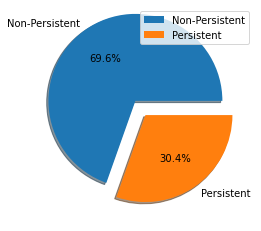

In [40]:
y = df['Persistency_Flag'].value_counts()
plt.figure(facecolor='white')
plt.pie(y, labels = ["Non-Persistent", "Persistent"], explode=[0.2,0], autopct='%1.1f%%', shadow=True)
plt.legend()
plt.show() 

In [41]:
df.groupby(["Gender",'Persistency_Flag']).Persistency_Flag.count()


Gender  Persistency_Flag
Female  Non-Persistent      1936
        Persistent           833
Male    Non-Persistent       111
        Persistent            62
Name: Persistency_Flag, dtype: int64

### Demographics Analysis

c:\Users\soniy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


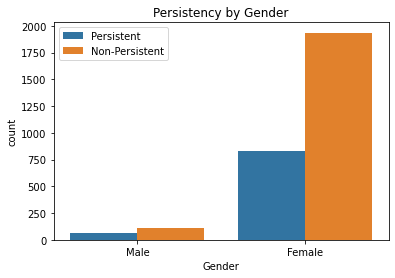

In [42]:
# Gender
sns.countplot(df['Gender'], hue=df['Persistency_Flag'])
plt.title("Persistency by Gender")
plt.legend()
plt.show()

c:\Users\soniy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


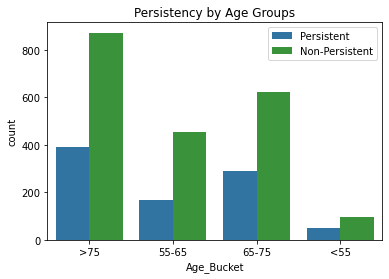

In [60]:
# Age
palette = ['tab:blue', 'tab:green']
sns.countplot(df['Age_Bucket'], hue=df['Persistency_Flag'], palette=palette)
plt.title("Persistency by Age Groups")
plt.legend()
plt.show()

c:\Users\soniy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


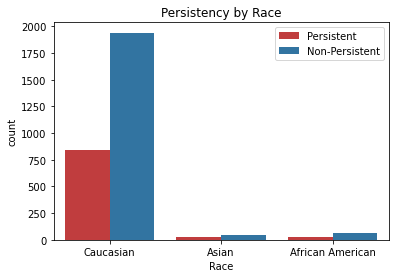

In [62]:
# Race
palette = ['tab:red', 'tab:blue']
sns.countplot(df['Race'], hue=df['Persistency_Flag'], palette=palette)
plt.title("Persistency by Race")
plt.legend()
plt.show()

c:\Users\soniy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


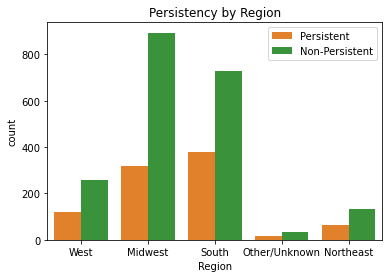

In [65]:
# Region
palette = ['tab:orange', 'tab:green']
sns.countplot(df['Region'], hue=df['Persistency_Flag'], palette=palette)
plt.title("Persistency by Region")
plt.legend()
plt.show()

c:\Users\soniy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


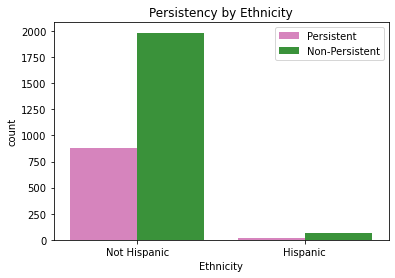

In [69]:
# Ethnicity
palette = ['tab:pink', 'tab:green']
sns.countplot(df['Ethnicity'], hue=df['Persistency_Flag'], palette=palette)
plt.title("Persistency by Ethnicity")
plt.legend()
plt.show()

### Clinical Factors

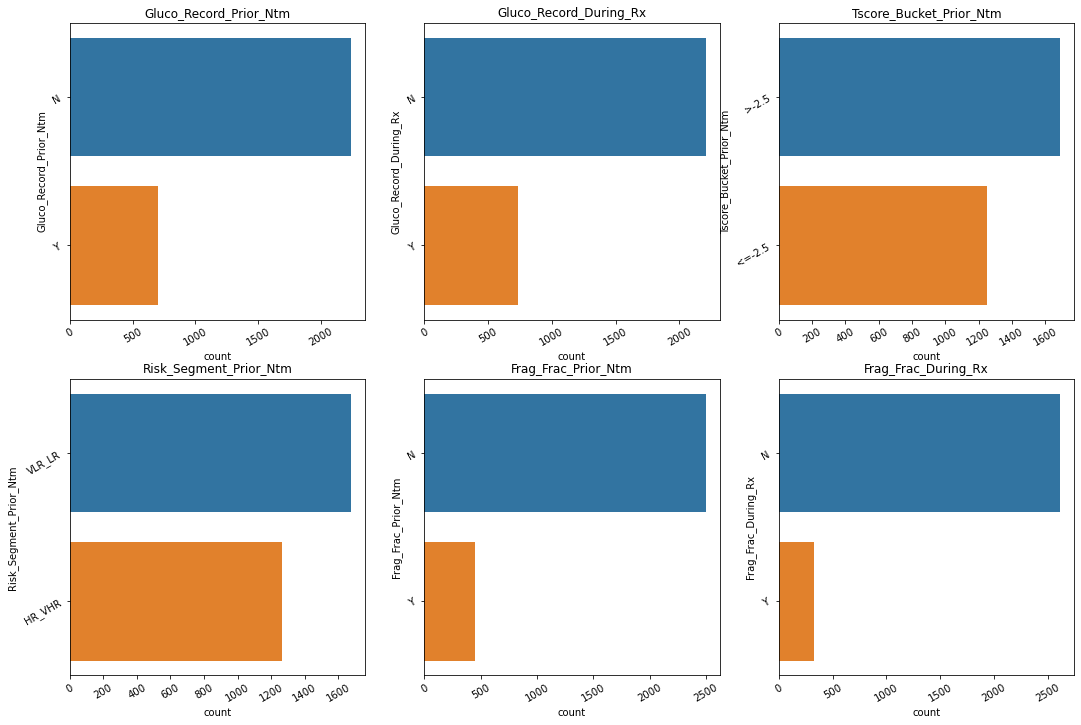

In [102]:
# Count plots of each factors variable
factors = ["Gluco_Record_Prior_Ntm", "Gluco_Record_During_Rx", "Tscore_Bucket_Prior_Ntm", "Risk_Segment_Prior_Ntm", "Frag_Frac_Prior_Ntm", "Frag_Frac_During_Rx"]
var_num = len(factors)
col_num = 3
row_num = math.ceil(var_num/col_num)

f, axes = plt.subplots(ncols=col_num, nrows=row_num, figsize=(18,12))
i = 0
j = 0
for col in factors:
    sns.countplot(y=df[col], ax=axes[j][i]).set(title=col)

    axes[j][i].tick_params(labelrotation=30)
    i += 1
    if i >= col_num:
        i = 0
        j += 1

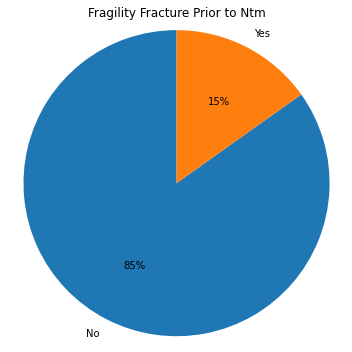

In [72]:
# Fragility Fracture prior to NTM
counts = df.groupby(["Frag_Frac_Prior_Ntm"]).Frag_Frac_Prior_Ntm.count()
plt.figure(facecolor='white')

counts.plot.pie(y=counts.index,autopct='%1.0f%%',startangle=90,ylabel="",labels=["No","Yes"], title="Fragility Fracture Prior to Ntm",figsize=(5,5))
plt.axis('equal')
plt.tight_layout()
plt.show()

### Disease/Treatment Factors

In [51]:
subset = df.iloc[:,20:]
subset = subset.replace("Y", 1, regex=True)
subset = subset.replace("N", 0, regex=True)
subset.iloc[:,:-1].sum().sort_values(ascending=False) / subset.shape[0]

Count_Of_Risks                                                        1.198844
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias       0.495241
Risk_Vitamin_D_Insufficiency                                          0.470428
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms                0.400068
Comorb_Encounter_For_Immunization                                     0.398029
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx       0.357240
Concom_Narcotics                                                      0.340925
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations           0.336166
Comorb_Vitamin_D_Deficiency                                           0.301496
Concom_Systemic_Corticosteroids_Plain                                 0.271584
Concom_Anti_Depressants_And_Mood_Stabilisers                          0.271244
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified                  0.270564
Comorb_Osteoporosis_without_current_pathological_fra

- NTM-Comorbidity: Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias has highest influence. 
- NTM-Risk Factors: Risk_Vitamin_D_Insufficiency has highest influence. 
- NTM-Concomitancy: Concom_Narcotics has highest influence. 

In [112]:
df.iloc[:,34:44]

,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines
0,N,N,N,N,N,N,N,N,N,N
1,N,N,N,N,N,N,N,N,N,N
2,Y,N,N,N,N,N,N,N,N,N
3,N,Y,Y,N,N,N,N,N,N,Y
4,N,Y,Y,Y,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...
2937,Y,Y,Y,Y,Y,N,N,N,N,N
2938,N,N,N,Y,N,Y,N,N,N,N
2939,Y,Y,N,N,N,N,N,N,Y,N
2940,N,Y,N,Y,N,N,N,N,N,N
